In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt

# Clustering demo for k-means with computer-generated appreciations data

num_clusters = 4

# read data (replace with your own path)
df = pd.read_csv('C:\\Users\\olliv\\Downloads\\appreciation_v3.csv', sep=';')
df.head(10)



,ID,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
0,1,4,4,5,7,8,9,6,9,5,6,9,2353,M,47
1,2,6,5,6,6,10,8,10,8,5,5,10,2954,M,63
2,3,5,6,7,5,6,4,5,6,6,4,5,3253,M,44
3,4,2,4,2,4,6,3,1,3,1,3,6,1484,M,31
4,5,10,8,3,7,10,5,7,9,9,7,5,2246,M,37
5,6,5,7,3,4,2,1,2,2,10,0,10,1978,F,23
6,7,7,9,2,7,4,4,2,3,10,0,6,2485,F,50
7,8,3,4,1,4,3,3,1,1,5,0,10,2822,M,25
8,9,7,6,6,9,9,7,10,10,7,5,3,3799,F,46
9,10,7,9,2,9,5,5,5,4,10,4,10,2185,M,34


In [2]:
# re-encode gender column
df['Gender'].replace(['M','F'], [1,2], inplace=True)

# drop ID
df.drop(columns=['ID'], inplace=True)

df.head(10)

,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
0,4,4,5,7,8,9,6,9,5,6,9,2353,1,47
1,6,5,6,6,10,8,10,8,5,5,10,2954,1,63
2,5,6,7,5,6,4,5,6,6,4,5,3253,1,44
3,2,4,2,4,6,3,1,3,1,3,6,1484,1,31
4,10,8,3,7,10,5,7,9,9,7,5,2246,1,37
5,5,7,3,4,2,1,2,2,10,0,10,1978,2,23
6,7,9,2,7,4,4,2,3,10,0,6,2485,2,50
7,3,4,1,4,3,3,1,1,5,0,10,2822,1,25
8,7,6,6,9,9,7,10,10,7,5,3,3799,2,46
9,7,9,2,9,5,5,5,4,10,4,10,2185,1,34


In [3]:
df.describe()

,Sports and exercise,Bars and clubs,Literature,Music,Family,Nature and wildlife,Gardening,Home decoration,Travel,Handicraft,Fashion and clothing,Monthly income,Gender,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,5.966000,5.931000,4.801000,6.183000,5.878000,4.849000,5.905000,5.89100,6.021000,3.943000,5.776000,3022.60200,1.483000,44.928000
std,2.451296,2.521626,2.445686,2.508746,2.520609,2.166308,2.453976,2.44481,2.538307,2.489166,2.611253,1004.48824,0.499961,12.833843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,264.00000,1.000000,18.000000
25%,4.000000,4.000000,3.000000,4.750000,4.000000,3.000000,4.000000,4.00000,4.000000,2.000000,4.000000,2329.00000,1.000000,35.000000
50%,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.00000,6.000000,4.000000,6.000000,3049.50000,1.000000,46.000000
75%,8.000000,8.000000,7.000000,8.000000,8.000000,6.000000,8.000000,8.00000,8.000000,6.000000,8.000000,3743.25000,2.000000,55.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6057.00000,2.000000,78.000000


In [10]:
# save column headings into a list as they will be lost
colnames = df.columns.values

# normalize all variables to mean=0, sd=1
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.802426,-0.766159,0.081408,0.325824,0.842281,1.917122,0.038732,1.272310,-0.402438,0.826795,1.235274,-0.666944,-0.966559,0.161529
1,0.013877,-0.369391,0.490496,-0.072981,1.636137,1.455276,1.669556,0.863075,-0.402438,0.424853,1.618424,-0.068330,-0.966559,1.408856
2,-0.394274,0.027377,0.899584,-0.471786,0.048425,-0.392107,-0.368974,0.044607,-0.008277,0.022911,-0.297324,0.229483,-0.966559,-0.072345
3,-1.618729,-0.766159,-1.145855,-0.870591,0.048425,-0.853953,-1.999797,-1.183097,-1.979080,-0.379031,0.085825,-1.532494,-0.966559,-1.085799
4,1.646483,0.820913,-0.736767,0.325824,1.636137,0.069739,0.446438,1.272310,1.174204,1.228737,-0.297324,-0.773519,-0.966559,-0.618051


In [11]:
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df_scaled)

centroids = kmeans.cluster_centers_
print(centroids)


C:\Users\olliv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\olliv\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[[-0.18096063 -0.10324621  0.20093619  0.05831252 -0.78953398 -0.72851325
  -0.46628635 -0.36294376  0.00469911 -0.78924376 -0.53383608  0.57706087
   0.01343163  0.66039578]
 [ 0.87240287  0.39374127  1.01086853  0.85909173  0.62632812  0.63952546
   0.91194123  1.02457399  0.16841528  0.73439427 -0.6907496   0.72032
  -0.22283382  0.76637526]
 [ 0.03504057 -0.0652022  -0.2504072  -0.15126527  0.69527092  0.65645391
   0.41623752  0.21739441 -0.01411679  0.70025743  0.50728997 -0.59004276
   0.18225352 -0.70120598]
 [-0.85479942 -0.26580995 -1.08431079 -0.87412062 -0.70503553 -0.73951319
  -1.04908499 -1.0527211  -0.18268468 -0.83610698  0.7656616  -0.74742375
   0.02516499 -0.75740931]]


In [12]:
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

   Sports and exercise  Bars and clubs  Literature     Music    Family  \
0            -0.180961       -0.103246    0.200936  0.058313 -0.789534   
1             0.872403        0.393741    1.010869  0.859092  0.626328   
2             0.035041       -0.065202   -0.250407 -0.151265  0.695271   
3            -0.854799       -0.265810   -1.084311 -0.874121 -0.705036   

   Nature and wildlife  Gardening  Home decoration    Travel  Handicraft  \
0            -0.728513  -0.466286        -0.362944  0.004699   -0.789244   
1             0.639525   0.911941         1.024574  0.168415    0.734394   
2             0.656454   0.416238         0.217394 -0.014117    0.700257   
3            -0.739513  -1.049085        -1.052721 -0.182685   -0.836107   

   Fashion and clothing  Monthly income    Gender       Age  
0             -0.533836        0.577061  0.013432  0.660396  
1             -0.690750        0.720320 -0.222834  0.766375  
2              0.507290       -0.590043  0.182254 -0.701206  


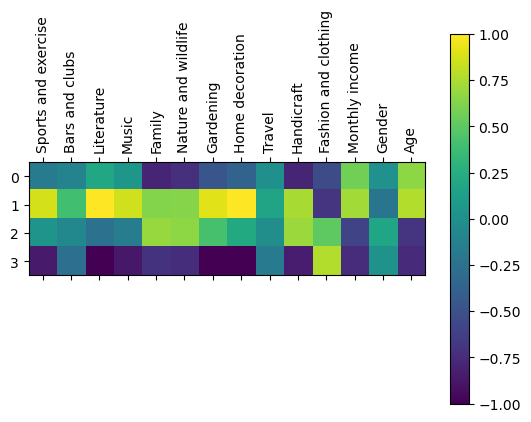

In [13]:
# visualize with matplotlib
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(centroids_df, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(colnames),1)
ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_yticklabels(cnames)
plt.show()

